## Importing libraries

In [1]:
import re    
import nltk  
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

## Loading training and testing datasets

In [2]:
train  = pd.read_csv('d1_train.csv',header='infer')                       #reading training dataset
test = pd.read_csv('d1_test.csv', header='infer')                         #reading testing dataset

## Data inspection

In [3]:
train[train['labels'] == 0].head(10)                                      #viewing hatespeech tweets i.e. label 0

,tweet,labels
85,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy11 queer"" gaywad",0
89,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a beaner smh you can tell hes a mexican",0
110,"""@DevilGrimz: @VigxRArts you're fucking gay, blacklisted hoe"" Holding out for #TehGodClan anyway http://t.co/xUCcwoetmn",0
184,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPLE https://t.co/RNvD2nLCDR"" This is why there's black people and niggers",0
202,"""@NoChillPaz: ""At least I'm not a nigger"" http://t.co/RGJa7CfoiT""\n\nLmfao",0
204,"""@NotoriousBM95: @_WhitePonyJr_ Ariza is a snake and a coward"" but at least he isn't a cripple like your hero Roach lmaoo",0
219,"""@RTNBA: Drakes new shoes that will be released by Nike/Jordan.... Yes, there's glitter on the shoes http://t.co/QCtPLxHEXM"" ....dudes a fag",0
260,"""@TheoMaxximus: #GerrysHalloweenParty http://t.co/3ycrSrnjHc"" Halloween was yesterday stupid nigger",0
312,"""@ashlingwilde: @ItsNotAdam is bored supposed to be cute, you faggot?"" Sometimes",0
315,"""@bigbootybishopp: @white_thunduh lassen cc , the coach wants me"" i feel it youll get more my nig no doubt",0


In [4]:
train[train['labels'] == 1].head(10)                                      #viewing offensive tweets i.e. label 1

,tweet,labels
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,1
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",1
6,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",1
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,1
8,""" &amp; you might not get ya bitch back &amp; thats that """,1
9,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",1
10,""" Keeks is a bitch she curves everyone "" lol I walked into a conversation like this. Smh",1


In [5]:
train[train['labels'] == 2].head(10)                                      #viewing neither tweets i.e. label 2

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,2
40,""" momma said no pussy cats inside my doghouse """,2
63,"""@Addicted2Guys: -SimplyAddictedToGuys http://t.co/1jL4hi8ZMF"" woof woof hot scally lad",2
66,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woof woof and hot soles",2
67,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these dishes."" One oreo? Lol",2
70,"""@ArizonasFinest6: Why the eggplant emoji doe?""y he say she looked like scream lmao",2
75,"""@BabyAnimalPics: baby monkey bathtime http://t.co/7KPWAdLF0R""\nAwwwwe! This is soooo ADORABLE!",2
115,"""@DomWorldPeace: Baseball season for the win. #Yankees"" This is where the love started",2
118,"""@DunderbaIl: I'm an early bird and I'm a night owl, so I'm wise and have worms.""",2
119,"""@EdgarPixar: Overdosing on heavy drugs doesn't sound bad tonight."" I do that pussy shit every day.",2


In [6]:
train.shape, test.shape                                                    #checking the dimensions of the datasets

((17348, 2), (7435, 2))

In [7]:
train["labels"].value_counts()                                                                  #checking the label distribution. it is an imbalance classification problem

1    13319
2     2926
0     1103
Name: labels, dtype: int64

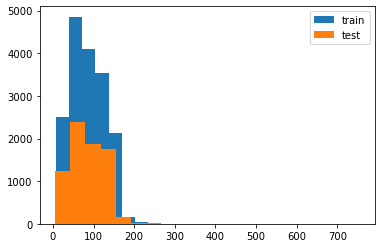

In [8]:
plt.hist(train.tweet.str.len(), bins=20, label='train')                    #check the distribution of length of the tweets, in terms of words, in both train and test datasets
plt.hist(test.tweet.str.len(), bins=20, label='test')
plt.legend()
plt.show()

## Combining the datasets

In [9]:
combine = train.append(test, ignore_index=True, sort=True)                                 #Combining the datasets
combine.shape                                                                              #checking the shape of the combined dataset

(24783, 2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


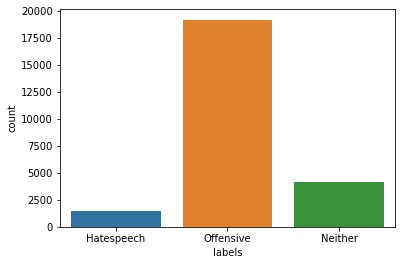

In [10]:
# visualize the target variable
g = sns.countplot(combine['labels'])
g.set_xticklabels(['Hatespeech','Offensive','Neither'])
plt.show()

## Data cleaning

In [26]:
def remove_pattern(input_txt, pattern):                                                  #function to remove unwanted text patterns from the tweets.
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt).split()
        input_txt = ' '.join(input_txt)
    return input_txt

In [27]:
combine['clean_tweet'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")             #Removing Twitter Handles (@user)
combine.head(10)

,labels,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,!!! RT : As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,!!!!! RT : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,!!!!!!!!! RT : she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,!!!!!!!!!!!!! RT : The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""","!!!!!!!!!!!!!!!!!!"": The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"""
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""","!!!!!!"": I can not just sit up and HATE on another bitch .. I got too much shit going on!"""
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,!!!!&#8220;: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,""" &amp; you might not get ya bitch back &amp; thats that """
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",""" :hobbies include: fighting Mariam"" bitch"


In [28]:
combine.clean_tweet = combine.clean_tweet.str.replace("[^a-zA-Z#]", " ")                          # Removing Punctuations, Numbers, and Special Characters except hash
combine.head(10)

<ipython-input-28-85dd87131703>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine.clean_tweet = combine.clean_tweet.str.replace("[^a-zA-Z#]", " ")                          # Removing Punctuations, Numbers, and Special Characters except hash


,labels,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,RT As a woman you shouldn t complain about cleaning up your house amp as a man you should always take the trash out
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,RT boy dats cold tyga dwn bad for cuffin dat hoe in the st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,RT Dawg RT You ever fuck a bitch and she start to cry You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,RT she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,RT The shit you hear about me might be true or it might be faker than the bitch who told it to ya #
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",The shit just blows me claim you so faithful and down for somebody but still fucking with hoes # # #
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",I can not just sit up and HATE on another bitch I got too much shit going on
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,# cause I m tired of you big bitches coming for us skinny girls #
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting Mariam bitch


In [32]:
combine.clean_tweet = combine.clean_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))   #Removing Short Words
combine.head(10)

,labels,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman you shouldn complain about cleaning your house amp man you should always take the trash out
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats cold tyga dwn bad for cuffin dat hoe the place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,Dawg You ever fuck bitch and she start cry You confused shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,she look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,The shit you hear about might true might faker than the bitch who told
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",The shit just blows claim you faithful and down for somebody but still fucking with hoes
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",can not just sit and HATE another bitch got too much shit going
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,cause tired you big bitches coming for skinny girls
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get bitch back amp thats that
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbies include fighting Mariam bitch


In [33]:
#Text Normalization
tokenized_tweet = combine.clean_tweet.apply(lambda x: x.split())                              #Text tokenization
tokenized_tweet.head()

0    [woman, you, shouldn, complain, about, cleaning, your, house, amp, man, you, should, always, take, the, trash, out]
1                                                   [boy, dats, cold, tyga, dwn, bad, for, cuffin, dat, hoe, the, place]
2                                              [Dawg, You, ever, fuck, bitch, and, she, start, cry, You, confused, shit]
3                                                                                              [she, look, like, tranny]
4                                  [The, shit, you, hear, about, might, true, might, faker, than, the, bitch, who, told]
Name: clean_tweet, dtype: object

In [34]:
from nltk.stem.porter import *                                                                #importing porterstemmer to normalize the tokenized tweets
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])               # stemming
tokenized_tweet.head()

0    [woman, you, shouldn, complain, about, clean, your, hous, amp, man, you, should, alway, take, the, trash, out]
1                                               [boy, dat, cold, tyga, dwn, bad, for, cuffin, dat, hoe, the, place]
2                                           [dawg, you, ever, fuck, bitch, and, she, start, cri, you, confus, shit]
3                                                                                         [she, look, like, tranni]
4                             [the, shit, you, hear, about, might, true, might, faker, than, the, bitch, who, told]
Name: clean_tweet, dtype: object

In [35]:
for i in range(len(tokenized_tweet)):                                                        #joining the tokenized tweets by the space in order to form a string
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combine['clean_tweet'] = tokenized_tweet
combine.head(10)

,labels,tweet,clean_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,woman you shouldn complain about clean your hous amp man you should alway take the trash out
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dat cold tyga dwn bad for cuffin dat hoe the place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg you ever fuck bitch and she start cri you confus shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,she look like tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,the shit you hear about might true might faker than the bitch who told
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",the shit just blow claim you faith and down for somebodi but still fuck with hoe
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!""",can not just sit and hate anoth bitch got too much shit go
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;,caus tire you big bitch come for skinni girl
8,1,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get bitch back amp that that
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch",hobbi includ fight mariam bitch


## Exploring and visualizing data

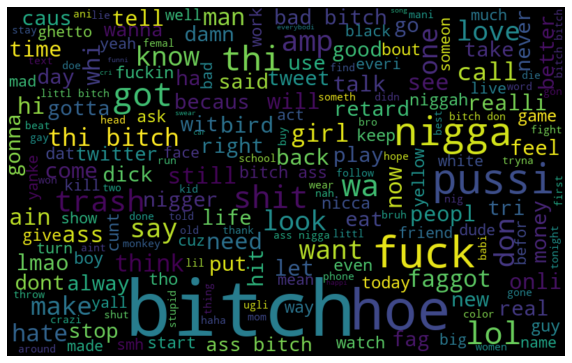

In [36]:
all_words = ' '.join([text for text in combine['clean_tweet']])                                      #to check the most frequent words in the tweets i'm using the wordcloud

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

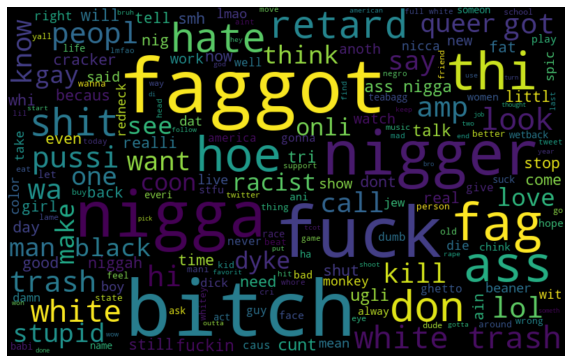

In [37]:
hatespeech_words =' '.join([text for text in combine['clean_tweet'][combine['labels'] == 0]])                      #Words in hatspeech tweets

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hatespeech_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

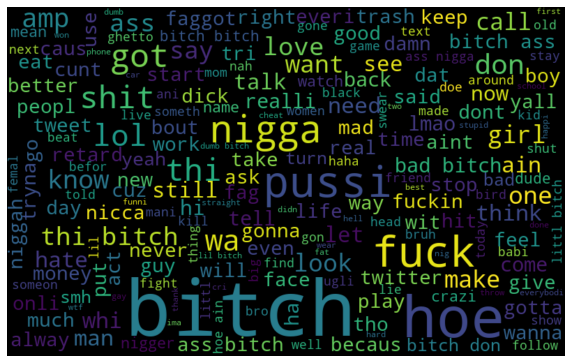

In [38]:
offensive_words = ' '.join([text for text in combine['clean_tweet'][combine['labels'] == 1]])                   #Words in offensive tweets

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

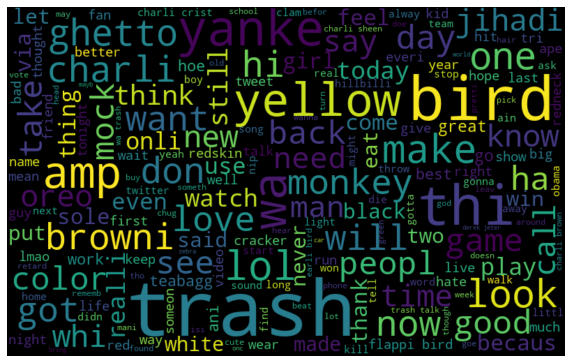

In [40]:
neither_words = ' '.join([text for text in combine['clean_tweet'][combine['labels'] == 2]])                           #Words in neither tweets

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neither_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Hashtags extraction

In [41]:
def hashtag_extract(x):                                                                      # function to collect hashtags 
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [43]:
HT_neither = hashtag_extract(combine['clean_tweet'][combine['labels'] == 2])                     # extracting hashtags from neither tweets                     

In [42]:
HT_hatespeech = hashtag_extract(combine['clean_tweet'][combine['labels'] == 0])                 # extracting hashtags from hatespeech tweets

In [44]:
HT_offensive = hashtag_extract(combine['clean_tweet'][combine['labels'] == 1])                  # extracting hashtags from offensive tweets

In [45]:
HT_neither = sum(HT_neither,[])                                                            # unnesting list
HT_hatespeech = sum(HT_hatespeech,[])
HT_offensive = sum(HT_offensive,[])

In [46]:
a = nltk.FreqDist(HT_neither)                                                             #plotting Neither Tweets hastags
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    })

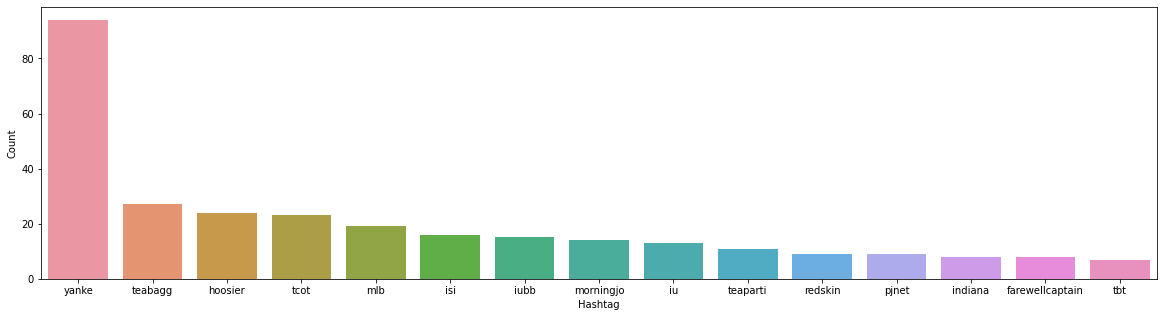

In [47]:
d = d.nlargest(columns="Count", n = 15)                                                  # selecting top 15 most frequent hashtags of neither tweets
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
#plt.xticks(rotation=90)
plt.show()

In [48]:
a = nltk.FreqDist(HT_hatespeech)                                                         #plotting Hatespeech Tweets hashtags
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    })

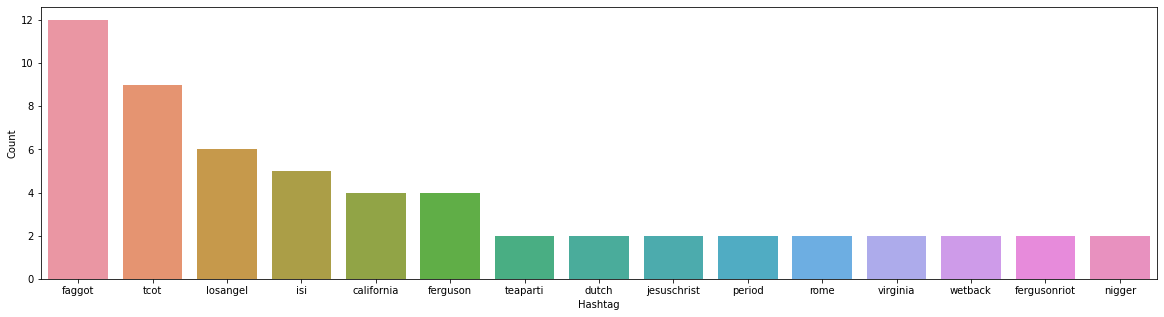

In [49]:
d = d.nlargest(columns="Count", n = 15)                                                   # selecting top 15 most frequent hashtags of hatespeech tweets
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
# plt.xticks(rotation=90)
plt.show()

In [50]:
a = nltk.FreqDist(HT_offensive)                                                           #plotting offensive Tweets hashtags
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    })

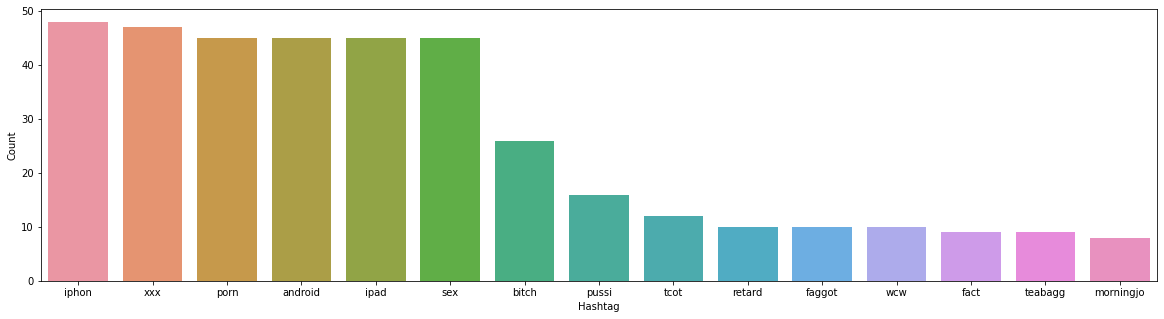

In [51]:
d = d.nlargest(columns="Count", n = 15)                                                   # selecting top 15 most frequent hashtags of offensive tweets
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
# plt.xticks(rotation=90)
plt.show()

## Word2Vec Embedding

In [52]:
import gensim

In [53]:
tokenized_tweet = combine['clean_tweet'].apply(lambda x: x.split())                                   # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=100,                                                                      # no. of features/independent variables
            window=7,                                                                             # context window size
            min_count=2,                                                                          # Ignores all words with total frequency lower than 2.                                  
            sg = 1,                                                                               # 1 for skip-gram model
            hs = 0,
            negative = 15,                                                                        # for negative sampling
            workers= 4,                                                                           # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(combine['clean_tweet']), epochs=15)

(2782002, 3777720)

In [1]:
model_w2v.wv.most_similar("fuck")                                                               #returns similar words to bitch using cosine similarity                                       

NameError: name 'model_w2v' is not defined

In [58]:
model_w2v.wv['bomb']                                                                             # check the vector representation of word bitch

array([ 2.90874630e-01, -8.69613469e-01, -3.15795332e-01,  7.08672777e-02,
        2.02349275e-01,  1.31521627e-01, -3.04649826e-02, -3.10056627e-01,
        2.43122354e-01,  5.41633964e-02,  1.87374875e-01, -3.19750756e-02,
       -1.59444332e-01, -1.57591254e-01,  4.59935993e-01, -2.01789171e-01,
        2.79372513e-01,  1.67096213e-01, -1.92499578e-01, -2.98667818e-01,
       -4.39546108e-01, -1.92418754e-01, -7.43618309e-01, -1.89849123e-01,
        4.94139530e-02,  2.93189406e-01, -6.19689119e-04, -3.18072259e-01,
        6.30333126e-02,  4.51386534e-02,  2.99426705e-01, -3.86337548e-01,
       -2.52782762e-01,  1.35037854e-01, -2.80079573e-01, -3.64880681e-01,
       -1.20944917e-01,  1.89915329e-01, -5.42128198e-02,  1.70998678e-01,
       -6.88753545e-01, -1.27235249e-01,  1.88192993e-01,  2.65424132e-01,
       -4.77712393e-01,  5.06682336e-01, -3.15164536e-01,  7.45862769e-03,
       -3.63258690e-01,  3.72000374e-02,  4.36025441e-01,  7.51416624e-01,
        5.21807582e-04,  

In [59]:
len(model_w2v.wv['bomb'])                                                                            #The length of the vector is 100

100

## Preparing Vectors for Tweets

In [60]:
def word_vector(tokens, size):                                                                       #function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [61]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))                                              #Preparing word2vec feature set
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 100)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(24783, 100)

## Random Forest Algorithm

In [84]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [85]:
# splitting data into training and validation set 
train_w2v = wordvec_df.iloc[:17348,:]
test_w2v = wordvec_df.iloc[17349:,:]

xtrain_w2v, xtest_w2v, ytrain, ytest = train_test_split(train_w2v, train['labels'], random_state=32, test_size=0.3)

In [86]:
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xtest_w2v = train_w2v.iloc[ytest.index,:]

In [87]:
rf = RandomForestClassifier(n_estimators=400, random_state=15,verbose=1).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xtest_w2v)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   58.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.4s finished


In [88]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rf, xtrain_w2v, ytrain, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise', verbose=2)
# # report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.3min finished


Accuracy: 0.838 (0.007)


## Evaluation

In [89]:
print(accuracy_score(ytest, prediction))

0.8386167146974063


In [90]:
print(recall_score(ytest, prediction, average='micro'))

0.8386167146974063


In [91]:
print(f1_score(ytest, prediction, average = 'micro'))

0.8386167146974063


In [92]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.61      0.04      0.08       322
           1       0.84      0.98      0.91      3972
           2       0.81      0.51      0.63       911

    accuracy                           0.84      5205
   macro avg       0.75      0.51      0.54      5205
weighted avg       0.82      0.84      0.81      5205



In [93]:
# View confusion matrix for test data and predictions
confusion_matrix(ytest, prediction)

array([[  14,  278,   30],
       [   9, 3883,   80],
       [   0,  443,  468]], dtype=int64)

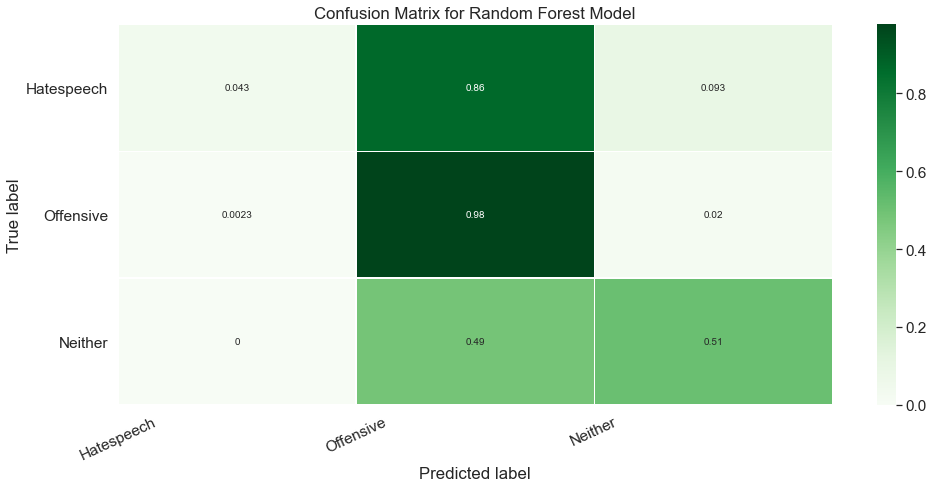

In [94]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(ytest, prediction)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Hatespeech', 'Offensive', 'Neither']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Prediction

In [95]:
# make a single prediction
yhat =rf.predict([[0.056383803,-0.074124387,-0.171414699,-0.02625953,0.342195754,-0.311753095,0.036303659,-0.001019213,0.183761349,-0.078248778,-0.139846484,0.229412474,-0.212095803,0.092054996,-0.069751981,-0.451219031,0.263646792,0.13420974,0.010123078,0.202264925,0.050845783,-0.10224698,-0.208902802,-0.20596402,-0.139536469,0.119513942,-0.009762181,0.187626989,-0.07980588,0.374799763,-0.07614733,0.074144462,0.314887495,0.065522385,0.071732971,0.369058985,-0.108079258,0.108540207,-0.368930169,-0.104299369,0.225075526,-0.398715854,0.17921077,-0.112708199,-0.384694973,-0.320380697,0.120445786,0.012723006,-0.203541966,0.182156852,-0.321899691,0.160632786,-0.490094076,0.399850202,0.182653573,-0.230054807,-0.065591489,0.385574499,-0.286182769,0.363871831,-0.073200157,-0.146963263,-0.24360581,-0.198529712,-0.042304233,0.097129034,-0.13236888,0.04561509,0.177606453,0.134248884,-0.117990632,-0.097321707,0.728234673,-0.186807688,0.214415124,-0.105123919,0.516194212,-0.184822984,0.406887942,-0.13275701,-0.255684116,0.176567912,0.221976789,0.070649865,0.009684363,-0.103015465,-0.517105633,-0.080921803,-0.029779333,0.018307519,-0.346803484,0.015831485,-0.179372174,-0.040299868,-0.186678363,-0.177113202,-0.024067639,0.304656579,0.032516231,0.087762232]])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


In [96]:
yhat =rf.predict([[0.007519501,0.102356576,-0.102409993,0.081509997,-0.055576155,-0.033348912,-0.13912719,-0.218636703,0.58762446,-0.086602683,-0.107238243,0.254986274,-0.10346991,-0.112862697,-0.219843124,-0.011092797,0.146158881,0.145883395,0.177393202,0.11592488,0.060727736,0.103326841,-0.272476398,-0.091884233,-0.016097376,0.05895047,0.062318784,0.284654912,-0.142398804,0.244750517,-0.029398509,0.084445093,-0.045968915,0.242604057,0.244065751,0.112111283,-0.084539079,0.072325768,-0.275158706,-0.135615519,0.23275068,-0.177243013,0.205163633,-0.288369883,-0.525373029,-0.311774693,0.51774637,-0.118066814,-0.256048261,-0.040398394,-0.225633823,0.01070765,-0.143104018,0.078210412,0.104723638,-0.007330964,-0.001453732,0.264602596,-0.142971951,0.125590879,-0.123909878,-0.445153813,-0.102466346,-0.138442782,0.541319091,-0.169738182,-0.035740487,0.178244147,0.045341548,0.117999899,0.15556764,-0.122161202,0.404334324,0.11198704,0.083704844,0.147467687,0.294416308,-0.171708714,0.230966877,-0.366212979,-0.382243084,0.291293183,0.512832357,-0.180972849,0.136339253,-0.447333851,0.003662425,0.194605311,-0.457106567,-0.441237729,-0.12492636,0.177867934,-0.347444626,0.14659475,-0.141850095,-0.157295623,0.117440763,0.157578874,-0.004217487,0.006119022]])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


In [ ]:
-0.046811372,0.07059292,0.156767702,-0.160483001,-0.196188892,-0.197436919,0.015930672,-0.008654778,0.441266749,-0.341527571,-0.427923312,0.369569788,-0.073013301,-0.293625861,-0.064251999,-0.421612913,0.10518533,0.320690592,-0.317064041,0.14569407,0.126434427,0.166016529,-0.530662944,0.261285578,0.092063481,0.013126351,0.014500679,0.251170923,0.173164828,0.269237285,0.001845843,0.240059689,0.138817048,0.272210802,0.24766626,0.189200456,0.08766073,0.017185681,-0.002677882,-0.168939054,-0.124645814,-0.237992396,-0.165167886,-0.271874862,-0.253656469,0.035008361,0.23863464,0.049999192,-0.130134982,-0.055417576,-0.147898248,0.171687668,-0.301919736,-0.097290456,0.38598831,0.087617325,0.053915175,0.147533794,-0.110206068,0.452947413,-0.034511686,-0.271829621,-0.166135376,-0.347278863,0.29844138,-0.179747003,0.000394697,0.161786079,0.236825789,-0.02541732,-0.059060787,-0.260731205,0.527215997,-0.008791994,0.164959162,-0.052016929,0.239928259,-0.190267288,0.148034401,-0.379365037,0.019102341,0.155330824,0.223431922,0.049334536,0.255148523,0.199017172,0.112024502,0.029080642,-0.045318867,-0.331187262,0.168023729,0.148660085,-0.314289515,-0.055193067,-0.510108771,-0.082749848,-0.173770033,0.513709302,0.250635142,0.013460885
-0.168372941,0.145141523,-0.10354114,-0.251492472,-0.068024203,-0.026806862,0.048043314,0.031404435,0.525597687,-0.126814277,-0.240433118,0.313698107,-0.238937621,-0.233923828,-0.168532832,-0.213425947,0.340147237,-0.145081096,-0.019566445,-0.014847858,-0.028842873,-0.133223929,-0.179867688,0.038049208,0.065080095,0.046569155,-0.024903987,0.181221183,-0.159157981,0.373466297,0.054050417,0.043888565,0.239777042,0.277655404,0.206367174,0.321086514,-0.046192847,-0.00904658,-0.080457586,-0.060265132,0.204281664,-0.216434512,-0.014427464,-0.119678657,-0.224059312,-0.141803446,0.218324616,-0.101480529,-0.224986922,0.107085174,-0.113418221,0.102585268,-0.233550971,0.00717375,0.14874816,0.124372515,0.158838858,0.297528195,-0.096720722,0.308980337,0.042101823,-0.285353649,-0.280584863,-0.161877643,0.128604724,-0.291854247,0.051470746,0.124855896,0.196910831,-0.022945456,0.18304405,-0.202660606,0.579944221,0.154216966,0.22912499,0.178957065,0.302326794,-0.225367678,0.216300468,-0.179848415,-0.213333955,0.318214991,0.364031926,0.053741087,0.092272016,-0.198587248,-0.227959054,0.167128284,-0.150836617,-0.386973469,-0.204674797,0.057011444,-0.293748716,0.189990229,-0.110440587,-0.237743549,-0.199349043,0.344916978,0.057701242,-0.050450901
0.007519501,0.102356576,-0.102409993,0.081509997,-0.055576155,-0.033348912,-0.13912719,-0.218636703,0.58762446,-0.086602683,-0.107238243,0.254986274,-0.10346991,-0.112862697,-0.219843124,-0.011092797,0.146158881,0.145883395,0.177393202,0.11592488,0.060727736,0.103326841,-0.272476398,-0.091884233,-0.016097376,0.05895047,0.062318784,0.284654912,-0.142398804,0.244750517,-0.029398509,0.084445093,-0.045968915,0.242604057,0.244065751,0.112111283,-0.084539079,0.072325768,-0.275158706,-0.135615519,0.23275068,-0.177243013,0.205163633,-0.288369883,-0.525373029,-0.311774693,0.51774637,-0.118066814,-0.256048261,-0.040398394,-0.225633823,0.01070765,-0.143104018,0.078210412,0.104723638,-0.007330964,-0.001453732,0.264602596,-0.142971951,0.125590879,-0.123909878,-0.445153813,-0.102466346,-0.138442782,0.541319091,-0.169738182,-0.035740487,0.178244147,0.045341548,0.117999899,0.15556764,-0.122161202,0.404334324,0.11198704,0.083704844,0.147467687,0.294416308,-0.171708714,0.230966877,-0.366212979,-0.382243084,0.291293183,0.512832357,-0.180972849,0.136339253,-0.447333851,0.003662425,0.194605311,-0.457106567,-0.441237729,-0.12492636,0.177867934,-0.347444626,0.14659475,-0.141850095,-0.157295623,0.117440763,0.157578874,-0.004217487,0.006119022


## Handling imbalance dataset

In [97]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [98]:
xtrain_smote, ytrain_smote = smote.fit_resample(xtrain_w2v.astype('float'),ytrain)

In [99]:
from collections import Counter
print("Before SMOTE :" , Counter(ytrain))
print("After SMOTE :" , Counter(ytrain_smote))

Before SMOTE : Counter({1: 9347, 2: 2015, 0: 781})
After SMOTE : Counter({1: 9347, 0: 9347, 2: 9347})


In [105]:
rf = RandomForestClassifier(n_estimators=400, random_state=15,verbose=1).fit(xtrain_smote, ytrain_smote) 
prediction = rf.predict(xtest_w2v)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.5s finished


In [106]:
print(accuracy_score(ytest, prediction))

0.846685878962536


In [107]:
print(recall_score(ytest, prediction, average="weighted"))

0.846685878962536


In [108]:
print(f1_score(ytest, prediction, average = 'weighted'))

0.8406597082251749


In [109]:
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.47      0.31      0.38       322
           1       0.89      0.92      0.91      3972
           2       0.72      0.71      0.71       911

    accuracy                           0.85      5205
   macro avg       0.70      0.65      0.67      5205
weighted avg       0.84      0.85      0.84      5205

